In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import Preprocessing as pp
from scipy.io import loadmat
from sklearn import metrics

In [2]:
temp_data_folder = '../Data/Temp_Data/'

## Import Data and small visualisation

In [3]:
df_validation = pp.openCSVFile('Messdaten_Test_ID_1/experiment_1.csv', temp_data_folder)

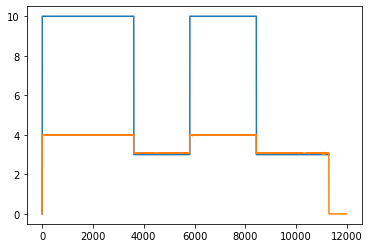

In [4]:
time_splits = [0, 1, 3605, 3606, 5811, 5812, 8429, 8430, 11294, 11295, len(df_validation['time'])]
voltage_splits = [0, 10, 10, 3, 3, 10, 10, 3, 3, 0, 0]
df_validation['time_fill'], df_validation['voltage'] = pp.fillData(time_splits, voltage_splits)

plt.plot(df_validation['time_fill'], df_validation['voltage'])
plt.plot(df_validation['time'], df_validation['spinning']/1000)
plt.show()

In [5]:
df_input = pp.openCSVFile('Messdaten_Test_ID_4b/input_drehzahl.csv', temp_data_folder)
df_input_drehzahl = pd.DataFrame()
dummy = []
df_input_drehzahl['nsoll_time'], df_input_drehzahl['nsoll_input_voltage'] = pp.fillData(np.array(df_input['nsoll_time'][:-1]), np.array(df_input['nsoll_input_voltage'][:-1]))
dummy, df_input_drehzahl['nsoll_measured'] = pp.fillData(np.array(df_input['nsoll_time'][:-1]), np.array(df_input['nsoll_measured'][:-1]))

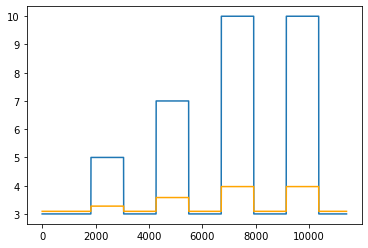

In [6]:
plt.plot(df_input_drehzahl['nsoll_time'], df_input_drehzahl['nsoll_input_voltage'])
plt.plot(df_input_drehzahl['nsoll_time'], df_input_drehzahl['nsoll_measured']/1000, 'orange')
plt.show()

## Predict spinning amount based on input

In [7]:
from sklearn import linear_model

In [8]:
reg_spin = linear_model.Ridge()
reg_spin.fit(df_input_drehzahl[['nsoll_input_voltage']], df_input_drehzahl['nsoll_measured'])

Ridge()

In [9]:
df_validation['spin_predict'] = reg_spin.predict(df_validation[['voltage']])

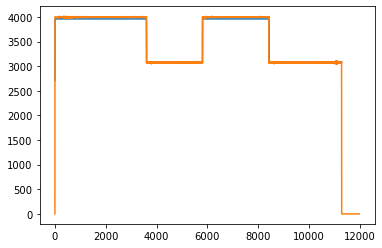

In [17]:
plt.plot(df_validation['time_fill'], df_validation['spin_predict'])
plt.plot(df_validation['time'], df_validation['spinning'])

In [18]:
def measureDifference(data, value_header, approx_header):
    R_SQUARED = True
    RSME = True
    
    data = data[data[approx_header].notnull()]
    values = data[value_header]
    approx = data[approx_header]
    
    if RSME:
        rms = metrics.mean_squared_error(values, approx, squared=False)
        print('The RMSE is %5.3f' %rms)
    if R_SQUARED:
        r2 = metrics.r2_score(values, approx)
        print('The R2-score is %5.3f' %r2)

In [19]:
measureDifference(df_validation[:11290], 'spinning', 'spin_predict')

The RMSE is 855.662
The R2-score is 0.219


## Predict voltage amount based on input

In [20]:
df_input_el_raw = pp.openCSVFile('el_output_raw.csv', temp_data_folder)
df_input_el_approx = pp.openCSVFile('el_output_approx.csv', temp_data_folder)

In [21]:
reg_volt = linear_model.Ridge()
reg_volt.fit(np.array(df_input_drehzahl['nsoll_input_voltage']).reshape(-1,1), np.array(df_input_el_raw['el_power'])[:11395])

Ridge()

In [22]:
df_validation['el_predict'] = reg_volt.predict(df_validation[['Visual']])

KeyError: "None of [Index(['Visual'], dtype='object')] are in the [columns]"

In [ ]:
plt.plot(df_validation['time'], df_validation['el_predict'])
plt.plot(df_validation['time'], df_validation['electric'])